<a href="https://colab.research.google.com/github/michaelwnau/ai-academy-machine-learning-2023/blob/main/W6S1_CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 6 - Session 1: Convolutional Neural Networks (CNN)
* Download the CIFAR10 dataset
* Normalize pixel values to be between 0 and 1

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy
numpy.random.seed(2)
tf.random.set_seed(2)

import ssl #this line seems to be necessary for windows users
ssl._create_default_https_context = ssl._create_unverified_context

### After running the above cell, answer the following questions:
  
  1. What is the CIFAR datset?
  2. What is the purpose for creating the dataset?

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

print("Loding CIFAR10 data... Done!")
print("train_images.shape = {}".format(train_images.shape))
print("train_labels.shape = {}".format(train_labels.shape))
print("test_images.shape = {}".format(test_images.shape))
print("test_labels.shape = {}\n".format(test_labels.shape))

train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 6s 0us/step
Loding CIFAR10 data... Done!
train_images.shape = (50000, 32, 32, 3)
train_labels.shape = (50000, 1)
test_images.shape = (10000, 32, 32, 3)
test_labels.shape = (10000, 1)



* Compared to Fashion-MNIST dataset, CIFAR-10 dataset has the following differences.
  1. Different training data size: 50,000 (CIFAR-10) vs 60,000 (Fashion-MNIST)
  2. Different image size: 32x32 (CIFAR-10) vs 28x28 (Fashion-MNIST)
  3. Different channel: 3 RGB channel (CIFAR-10) vs 1 grayscale channel (Fashion-MNIST)

 * Verify the data

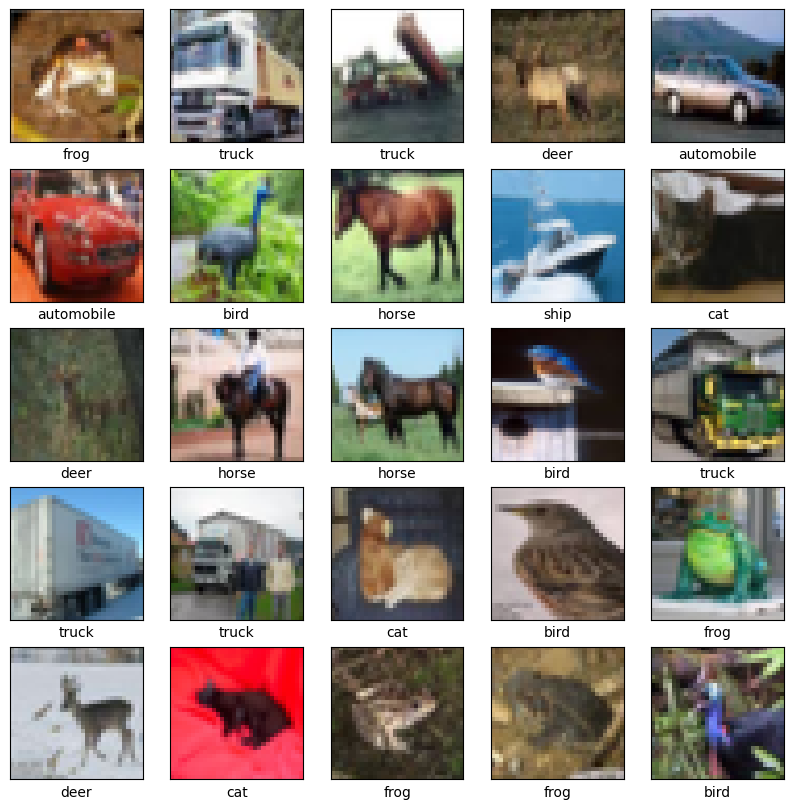

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

* Set up two CNN-based image classification models

In [4]:
# model 1: Baseline model
model1 = models.Sequential()
model1.add(layers.Conv2D(32, 2, activation='relu', input_shape=(32, 32, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, 2, activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(10))

# model 2: Deeper CNN with dropout
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.2))
model2.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.2))
model2.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.2))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(10))

### After the above code runs, answer the following questions:
- How are the above models the same/different?

* Compile and train the baseline model

In [5]:
%%time
# Model 1
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history1 = model1.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/10
782/782 [==============================] - 14s 6ms/step - loss: 1.4593 - accuracy: 0.4805 - val_loss: 1.2416 - val_accuracy: 0.5649
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 1.1197 - accuracy: 0.6070 - val_loss: 1.0930 - val_accuracy: 0.6199
Epoch 3/10
782/782 [==============================] - 4s 6ms/step - loss: 0.9903 - accuracy: 0.6550 - val_loss: 0.9843 - val_accuracy: 0.6577
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.8985 - accuracy: 0.6860 - val_loss: 0.9498 - val_accuracy: 0.6708
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.8266 - accuracy: 0.7138 - val_loss: 0.9344 - val_accuracy: 0.6794
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.7608 - accuracy: 0.7357 - val_loss: 0.9081 - val_accuracy: 0.6856
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.7001 - accuracy: 0.7563 - val_loss: 0.8855 - val_accuracy: 0.6952
Epoch

### As the above code and below code executes, answer the following questions:

1. How is the accuracy changing as each epoch executes?
2. How is the loss changing?
3. what is meant by loss, val_loss, and val_accuracy?

In [6]:
%%time
# Model 2
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history2 = model2.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/10
782/782 [==============================] - 11s 9ms/step - loss: 1.7206 - accuracy: 0.3662 - val_loss: 1.3839 - val_accuracy: 0.4837
Epoch 2/10
782/782 [==============================] - 6s 7ms/step - loss: 1.2598 - accuracy: 0.5466 - val_loss: 1.0072 - val_accuracy: 0.6434
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 1.0151 - accuracy: 0.6426 - val_loss: 0.8508 - val_accuracy: 0.7020
Epoch 4/10
782/782 [==============================] - 6s 7ms/step - loss: 0.8601 - accuracy: 0.6988 - val_loss: 0.7728 - val_accuracy: 0.7305
Epoch 5/10
782/782 [==============================] - 7s 8ms/step - loss: 0.7764 - accuracy: 0.7265 - val_loss: 0.7596 - val_accuracy: 0.7399
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.7005 - accuracy: 0.7558 - val_loss: 0.7071 - val_accuracy: 0.7621
Epoch 7/10
782/782 [==============================] - 7s 8ms/step - loss: 0.6446 - accuracy: 0.7759 - val_loss: 0.6884 - val_accuracy: 0.7607
Epoch

* Plot the training curves for both models.
* Evaluate the results and compare the performance of two models.

Evaluation of the baseline model ---

Test Accuracy > 0.7143999934196472
Test Loss > 0.881968080997467
CPU times: user 1.28 s, sys: 353 ms, total: 1.63 s
Wall time: 1.89 s


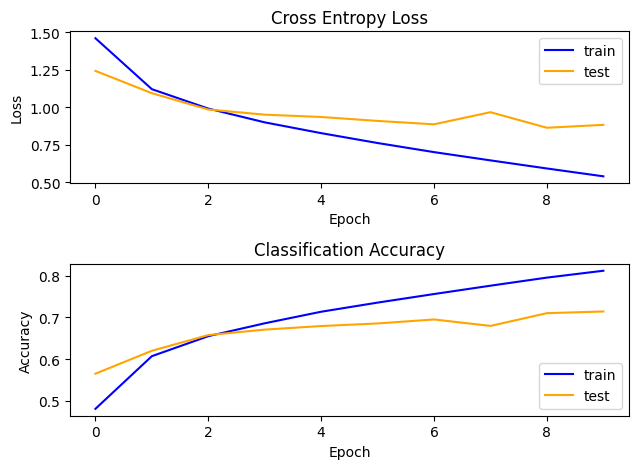

In [7]:
%%time
# Model 1
model = model1
history = history1

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

# print out test acc/loss
print("Evaluation of the baseline model ---\n")
print("Test Accuracy > {}".format(test_acc))
print("Test Loss > {}".format(test_loss))

# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()

### After running the above code, answer the following questions.


1. What are these graphs telling us?
2. At what epoch do we see the best results?


Evaluation of the NEW model ---

Test Accuracy > 0.7943000197410583
Test Loss > 0.6142967343330383
CPU times: user 1.46 s, sys: 307 ms, total: 1.76 s
Wall time: 1.97 s


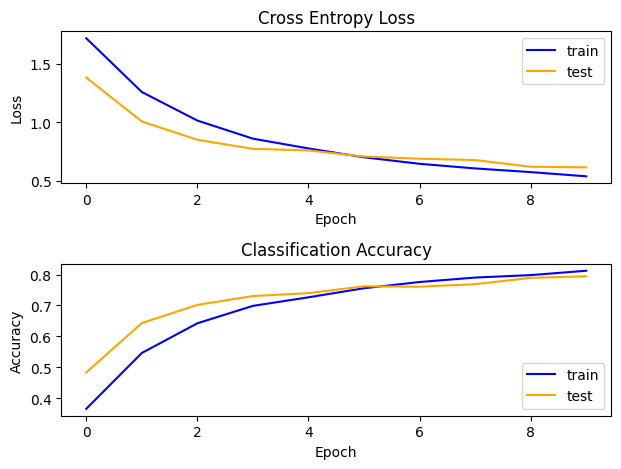

In [8]:
%%time
# Model 2
model = model2
history = history2

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

# print out test acc/loss
print("Evaluation of the NEW model ---\n")
print("Test Accuracy > {}".format(test_acc))
print("Test Loss > {}".format(test_loss))

# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()

### Additional Questions
1. A deeper neural networks is always better?
2. What is the role of dropout in neural networks?